# Find Parity of register of qubits using only CNOT Gates

In [25]:
import qiskit
assert qiskit.__version__ == '1.4.1'

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
import qiskit.quantum_info as qi

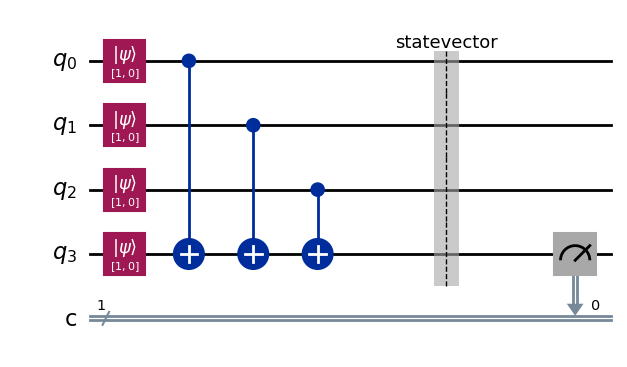

In [26]:
# Create a quantum circuit with initialized qubits
qc = QuantumCircuit(4, 1)

psi_0 = qi.Statevector([1, 0])  # |0>
psi_1 = qi.Statevector([1, 0])  # |0>
psi_2 = qi.Statevector([1, 0])  # |0>
psi_3 = qi.Statevector([1, 0])  # |0>

qc.initialize(psi_0.data, 0)
qc.initialize(psi_1.data, 1)
qc.initialize(psi_2.data, 2)
qc.initialize(psi_3.data, 3)

qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)

qc.save_statevector()

qc.measure(3, 0)

qc.draw(output='mpl')

### States of cubits before measurements

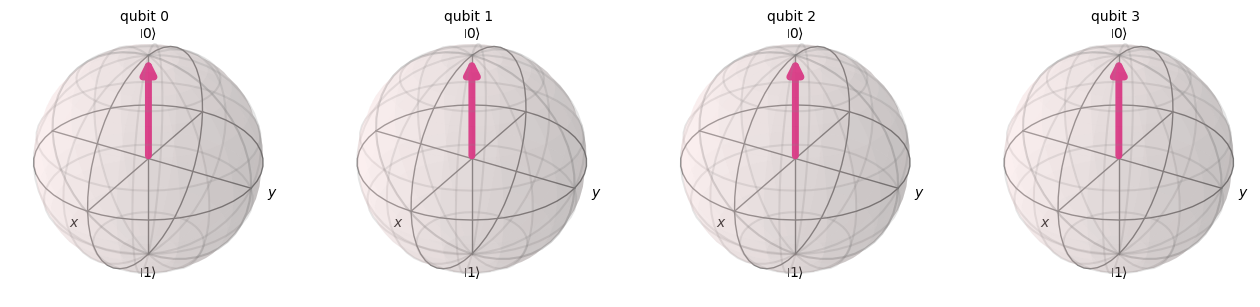

In [27]:
sim = AerSimulator(method='statevector')
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
state_vec = result.get_statevector()
plot_bloch_multivector(state_vec)

In [28]:
print(f"The output qubit is in the state: {counts}")

The output qubit is in the state: {'0': 1000}


Changing the quibits, the parity changes

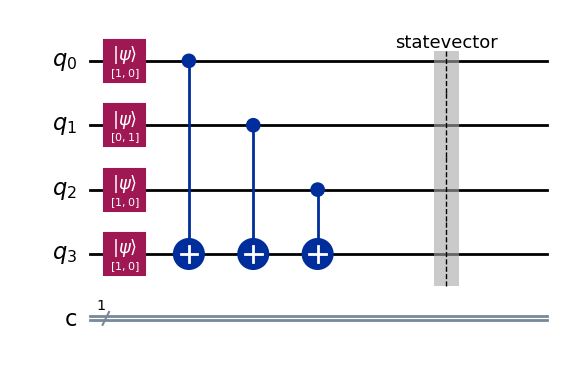

In [29]:
qc = QuantumCircuit(4, 1)

psi_0 = qi.Statevector([1, 0])
psi_1 = qi.Statevector([0, 1])
psi_2 = qi.Statevector([1, 0])
psi_3 = qi.Statevector([1, 0])

qc.initialize(psi_0.data, 0)
qc.initialize(psi_1.data, 1)
qc.initialize(psi_2.data, 2)
qc.initialize(psi_3.data, 3)

qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)

qc.save_statevector()
qc.draw(output='mpl')


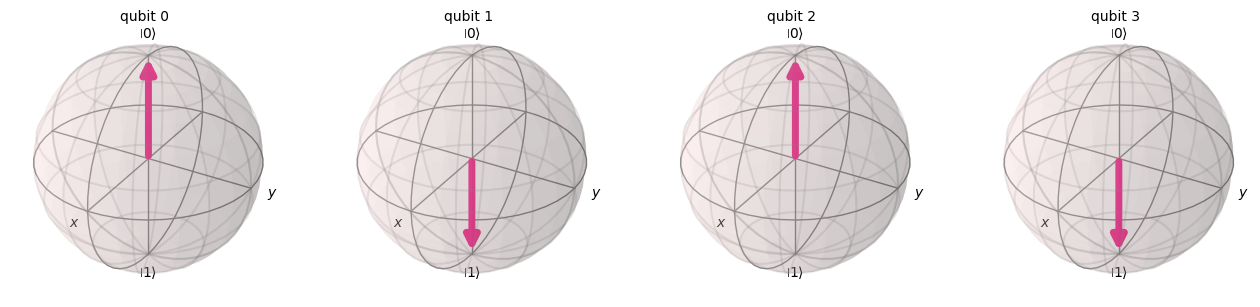

In [30]:
sim = AerSimulator(method='statevector')
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
state_vec = result.get_statevector()
plot_bloch_multivector(state_vec)
# qc.draw(output='mpl')

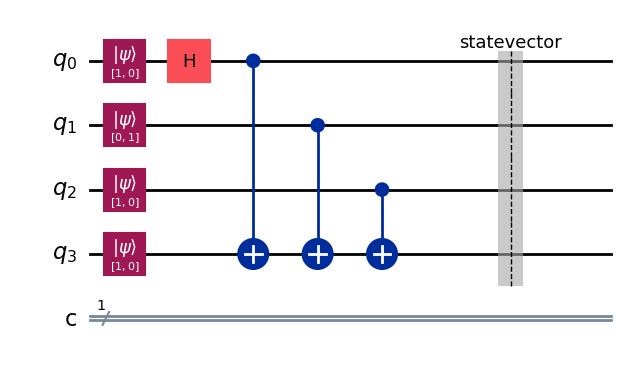

In [31]:
qc = QuantumCircuit(4, 1)

psi_0 = qi.Statevector([1, 0])
psi_1 = qi.Statevector([0, 1])
psi_2 = qi.Statevector([1, 0])
psi_3 = qi.Statevector([1, 0])

qc.initialize(psi_0.data, 0)
qc.initialize(psi_1.data, 1)
qc.initialize(psi_2.data, 2)
qc.initialize(psi_3.data, 3)

qc.h(0)

qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)

qc.save_statevector()

qc.draw(output='mpl')


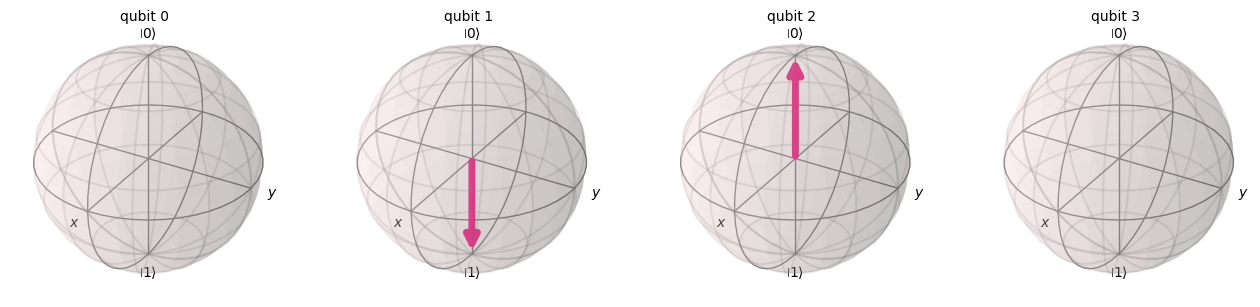

In [32]:

sim = AerSimulator(method='statevector')
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
state_vec = result.get_statevector()
plot_bloch_multivector(state_vec)

### Parity with Toffoli or Multi Controlled Not gates

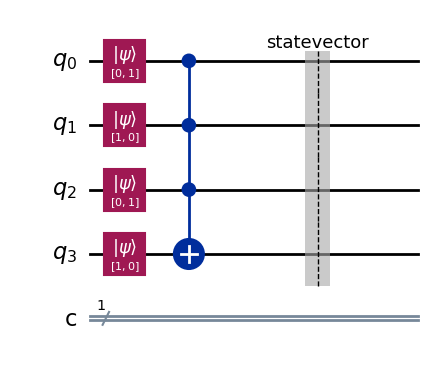

In [33]:
qc = QuantumCircuit(4, 1)

psi_0 = qi.Statevector([0, 1])
psi_1 = qi.Statevector([1, 0])
psi_2 = qi.Statevector([0, 1])
psi_3 = qi.Statevector([1, 0])

qc.initialize(psi_0.data, 0)
qc.initialize(psi_1.data, 1)
qc.initialize(psi_2.data, 2)
qc.initialize(psi_3.data, 3)

# qc.h(0)

# apply multi controlled x gate
qc.mcx([0, 1, 2], 3)

qc.save_statevector()

qc.draw(output='mpl')

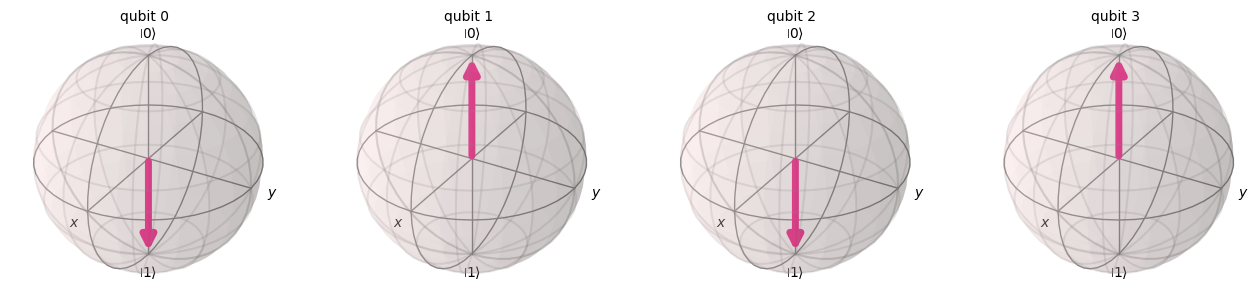

In [34]:
sim = AerSimulator(method='statevector')
result = sim.run(qc).result()
state_vec = result.get_statevector()
plot_bloch_multivector(state_vec)